# Plot Compare Mock Spec-Phot

In [1]:
"""Phot/Spec cornerplots

This script is intended to show a corner plot of posterior PDF constraints for
a parameteric SFH inferred from
    * photometry alone,
    * spectroscopy alone, and
    * photometry + spectroscopy,
"""

from copy import deepcopy
import os, glob
from argparse import ArgumentParser
import numpy as np

import matplotlib.pyplot as pl
from matplotlib import rcParams
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

from prospect.plotting import FigureMaker, dict_to_struct
from prospect.plotting.corner import marginal, scatter, get_spans, corner, prettify_axes
from prospect.plotting.sed import to_nufnu, convolve_spec

from defaults import pretty, plot_defaults, colorcycle

In [2]:
from compare_mock_specphot import *

# Config

In [3]:
! ls ../fitting/output_examples

mock_parametric_phot_23May29-09.04_result.h5
mock_parametric_spec_23May29-12.28_result.h5
mock_parametric_specphot_23May29-18.30_result.h5


In [4]:
results_file_phot =  "../fitting/output_examples/mock_parametric_phot_23May29-09.04_result.h5"
results_file_spec =  "../fitting/output_examples/mock_parametric_spec_23May29-12.28_result.h5"
results_file_specphot =  "../fitting/output_examples/mock_parametric_specphot_23May29-18.30_result.h5"

In [5]:
nprior=100000
nseds=1000
fignum="mock_specphot" 

# Arguments

In [6]:
parser = ArgumentParser()
parser.add_argument("--fignum", type=str, default="")
parser.add_argument("--figext", type=str, default="png")
parser.add_argument("--phot_file", type=str, default="")
parser.add_argument("--spec_file", type=str, default="")
parser.add_argument("--specphot_file", type=str, default="")
parser.add_argument("--prior_samples", type=int, default=int(1e4))
parser.add_argument("--n_seds", type=int, default=0)

_StoreAction(option_strings=['--n_seds'], dest='n_seds', nargs=None, const=None, default=0, type=<class 'int'>, choices=None, help=None, metavar=None)

In [7]:
args = parser.parse_args(args=[])

In [8]:
args

Namespace(figext='png', fignum='', n_seds=0, phot_file='', prior_samples=10000, spec_file='', specphot_file='')

In [9]:
parser.set_defaults(phot_file = results_file_phot)
parser.set_defaults(spec_file = results_file_spec)
parser.set_defaults(specphot_file = results_file_specphot)

In [10]:
parser.set_defaults(fignum = fignum)
parser.set_defaults(n_seds = nseds)
parser.set_defaults(prior_samples = nprior)

In [11]:
args = parser.parse_args(args=[])

In [12]:
args

Namespace(figext='png', fignum='mock_specphot', n_seds=1000, phot_file='../fitting/output_examples/mock_parametric_phot_23May29-09.04_result.h5', prior_samples=100000, spec_file='../fitting/output_examples/mock_parametric_spec_23May29-12.28_result.h5', specphot_file='../fitting/output_examples/mock_parametric_specphot_23May29-18.30_result.h5')

# Plot

In [13]:
show = Plotter.show

In [14]:
# instantiate the plotters
plotters = [Plotter(results_file=f, **vars(args)) for f in [args.phot_file, args.spec_file, args.specphot_file]]

# make styles with different color for each plotter
[p.styles() for p in plotters]
cind = [0, 1, 3]
for i, p in enumerate(plotters):
    p.pkwargs["color"] = colorcycle[cind[i]]
    p.dkwargs = dict(color="gray", linestyle="-", linewidth=0.75, marker="")
    p.make_art()
    if i < 2:
        p.prior_samples = 0

# get limits for the plots
spans, xx = multispan([p.parchain for p in plotters], [p.weights for p in plotters], show)


building sps from paramfile


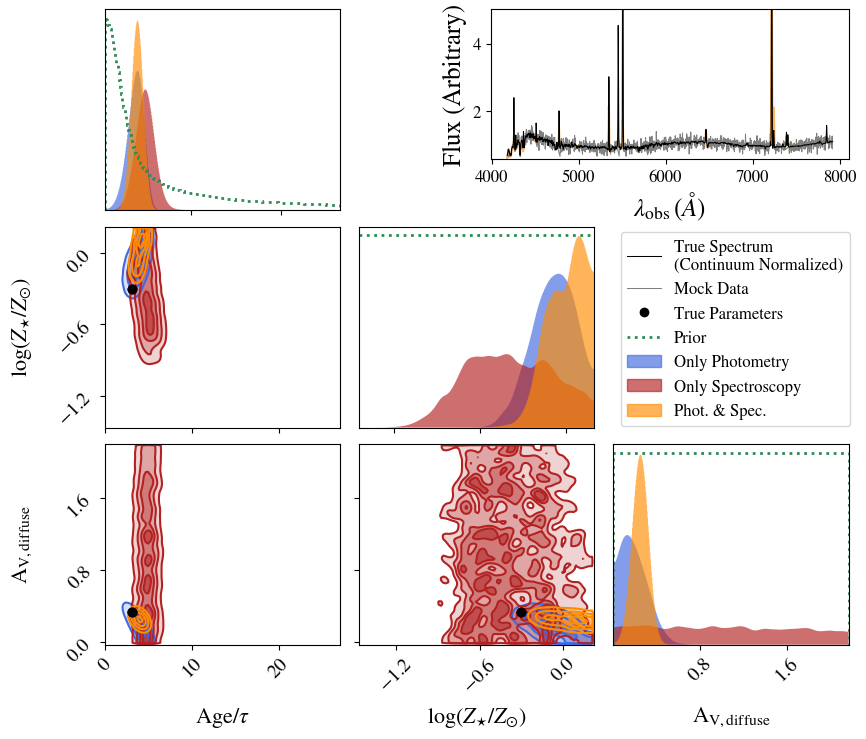

In [15]:
# make and fill figures
fig, paxes = pl.subplots(len(show), len(show), figsize=(9.6, 8.25))
sax = fig.add_subplot(4, 2, 2)
[p.plot_corner(paxes, spans) for p in plotters]
plotters[-1].plot_spectrum(sax,args.n_seds)

leg = ["Only Photometry", "Only Spectroscopy", "Phot. & Spec."]
art = [p.art["posterior"] for p in plotters]
plotters[-1].make_legend(fig, eleg=leg, eart=art, fontsize=12)
fig.subplots_adjust(wspace=0.08, hspace=0.08)


# Save plot

In [16]:
# --- Saving ----
# ---------------
if args.fignum:
    fig.savefig("paperfigures/{}.{}".format(args.fignum, args.figext), dpi=400)
else:
    pl.ion()
    pl.show()